<a href="https://colab.research.google.com/github/parateja/teja/blob/main/NLP_INTERNAL_AND_EXTERNAL_PROGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#exp-1(word tokenization)

import nltk
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(" my name is jithendra teja i am studying B.tech third year")

print(doc)
for s in doc.sents:
  print(s)

for s in doc.sents:
  for w in s:
    print(w)


 my name is jithendra teja i am studying B.tech third year
 my name is jithendra teja i am studying B.tech third year
 
my
name
is
jithendra
teja
i
am
studying
B.tech
third
year


In [3]:
#exp-2(word generation)

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text="the boy is drinking milk"
word=word_tokenize(text)
print(word)

nltk.download('averaged_perceptron_tagger')
tags=nltk.pos_tag(word)
print(tags)

# parse tree construction

from nltk import pos_tag, word_tokenize, RegexpParser

chunker = RegexpParser("""
                    NP: {<DT>?<JJ>*<NN>} #To extract Noun Phrases
                    P: {<IN>}            #To extract Prepositions
                    V: {<V.*>}           #To extract Verbs
                    PP: {<p> <NP>}       #To extract Prepositional Phrases
                    VP: {<V> <NP|PP>*}   #To extract Verb Phrases
                    """)

output = chunker.parse(tags)
print(output)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['the', 'boy', 'is', 'drinking', 'milk']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('the', 'DT'), ('boy', 'NN'), ('is', 'VBZ'), ('drinking', 'VBG'), ('milk', 'NN')]
(S
  (NP the/DT boy/NN)
  (VP (V is/VBZ))
  (VP (V drinking/VBG) (NP milk/NN)))


In [5]:
#exp-3(morphological analysis)

import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp("the dogs are barking")
for token in doc:
  print(token,"|",token.morph)
  print(token,"|",token.pos)
  print(token,"|",token.pos_)
  print(token,"|",token.tag_)
  print(token,"|",spacy.explain(token.tag_))
  print(token,"|",spacy.explain(token.tag))
#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language="english")
token=input("enter a token: ")
stemmer.stem(token)

/usr/local/lib/python3.10/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term '15267657372422890137' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.10/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term '783433942507015291' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.10/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term '9188597074677201817' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/li

the | Definite=Def|PronType=Art
the | 90
the | DET
the | DT
the | determiner
the | None
dogs | Number=Plur
dogs | 92
dogs | NOUN
dogs | NNS
dogs | noun, plural
dogs | None
are | Mood=Ind|Tense=Pres|VerbForm=Fin
are | 87
are | AUX
are | VBP
are | verb, non-3rd person singular present
are | None
barking | Aspect=Prog|Tense=Pres|VerbForm=Part
barking | 100
barking | VERB
barking | VBG
barking | verb, gerund or present participle
barking | None
enter a token: dogs


'dog'

In [6]:
#exp-4(N-gram)

import nltk
from nltk.util import ngrams
nltk.download('punkt')
samplText='this is a very good book to study'
NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=3)
for grams in NGRAMS:
    print(grams)

('this', 'is', 'a')
('is', 'a', 'very')
('a', 'very', 'good')
('very', 'good', 'book')
('good', 'book', 'to')
('book', 'to', 'study')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# exp-5(N-gram smoothing)

import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

# main module begin here

sentences = "This sntence contins errors. This sentence has to be corrcted."
list_string = sentences.split(' ')
for word in list_string:
    print(correction(word))


print(' '.join('<<'+i+'>>'+' %s'%correction(i) if correction(i) != i else i for i in sentences.split()))


this
sntence
contins
errors
this
sentence
has
to
be
corrcted
<<This>> this sntence contins <<errors.>> errors <<This>> this sentence has to be <<corrcted.>> corrcted


In [ ]:
# exp-6(hidden morkov model)

import nltk
nltk.download('brown')

import nltk
from nltk.corpus import brown

# Load the Brown corpus
corpus = brown.tagged_sents()

# Split corpus into train and test sets
train_corpus = corpus[:int(0.8*len(corpus))]
test_corpus = corpus[int(0.8*len(corpus)):]

# Define the tagset
tagset = set([tag for sentence in corpus for _, tag in sentence])

# Define the HMM model
trainer = nltk.tag.hmm.HiddenMarkovModelTrainer(tagset)

# Train the model on the training set
model = trainer.train_supervised(train_corpus)

# Test the model on the test set
accuracy = model.accuracy(test_corpus)
print("Accuracy:", accuracy)

# Use the model to tag a new sentence
new_sentence = "The quick brown fox jumps over the lazy dog".split()
tagged_sentence = model.tag(new_sentence)
print(tagged_sentence)




[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


In [45]:
#exp-7(viterbi algorithm)

import numpy as np

def viterbi_decode(obs, states, start_p, trans_p, emit_p):
    # Initialize variables
    N = len(obs)
    T = len(states)
    path = np.zeros((N, T))
    prob = np.zeros((N, T))
    path[0, :] = 0
    prob[0, :] = start_p * emit_p[:, obs[0]]

    # Run Viterbi algorithm
    for t in range(1, N):
        for j in range(T):
            prob[t, j] = np.max(prob[t-1, :] * trans_p[:, j] * emit_p[j, obs[t]])
            path[t, j] = np.argmax(prob[t-1, :] * trans_p[:, j])

    # Backtrack to find the most likely sequence of states
    best_seq = np.zeros(N)
    best_seq[-1] = np.argmax(prob[-1, :])
    for t in range(N-2, -1, -1):
        best_seq[t] = path[t+1, int(best_seq[t+1])]

    # Convert the sequence of state indices to labels
    best_labels = [states[int(i)] for i in best_seq]
    return best_labels

# Example sentence
sentence = "I like pizza"

# Example POS tags and their corresponding indices
tags = ['PRP', 'VBP', 'NN']
tag_indices = {word: i for i, word in enumerate(sentence.split())}
tag_indices.update({tag: i for i, tag in enumerate(tags)})

# Example transition probabilities
trans_p = np.array([
    [0.4, 0.6, 0.0],
    [0.0, 0.4, 0.6],
    [0.0, 0.0, 1.0],
])

# Example emission probabilities
emit_p = np.array([
    [0.1, 0.4, 0.5],
    [0.0, 0.9, 0.1],
    [0.0, 0.0, 1.0],
])

# Convert the sentence to a list of word indices
obs = [tag_indices[word] for word in sentence.split()]

# Run Viterbi decoding
tags = viterbi_decode(obs, tags, np.array([1.0, 0.0, 0.0]), trans_p, emit_p)

# Print the resulting tags
print(tags)


['PRP', 'VBP', 'NN']


In [24]:
#exp-8(penn tree bank)

import nltk
from nltk.tokenize import word_tokenize

# Download the Penn Treebank corpus and the Punkt tokenizer (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Given sentence
sentence = "The tagger produced good results."

# Tokenize the sentence
tokens = word_tokenize(sentence)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Print the POS tagged tokens
print("POS tagged tokens:")
print(pos_tags)


POS tagged tokens:
[('The', 'DT'), ('tagger', 'NN'), ('produced', 'VBD'), ('good', 'JJ'), ('results', 'NNS'), ('.', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'), ('am', 'VBP'), ('a', 'DT'), ('coding', 'NN'), ('ninja', 'NN'), (',', ','), ('and', 'CC'), ('I', 'PRP'), ('am', 'VBP'), ('the', 'DT'), ('best', 'JJS'), ('in', 'IN'), ('coding', 'NN'), ('.', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


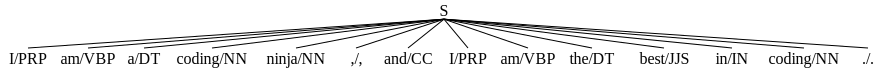

In [39]:
#exp-9(chunked text)

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
sample_text= "I am a coding ninja, and I am the best in coding."
import os
os.system('Xvfb :1 -screen 0 1600x1200x16 &') # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0' # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline
from nltk.tree import Tree
from IPython.display import display
tokenized=nltk.sent_tokenize(sample_text)
for i in tokenized:
 words=nltk.word_tokenize(i)
 tagged_words=nltk.pos_tag(words)
 print(tagged_words)
 chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}""" # this is the grammar that we define,
 chunkParser=nltk.RegexpParser(chunkGram)
 chunked=chunkParser.parse(tagged_words)
 tree = Tree.fromstring(str(chunked))
 display(tree)




In [43]:
#exp-10(chunk parser)

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
from nltk.corpus import conll2000
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk import ChunkParserI, TrigramTagger
import random

# Load Conll2000 chunked sentences
chunked_sentences = list(conll2000.chunked_sents())

# Shuffle the sentences
random.shuffle(chunked_sentences)

# Split into train and test sets
train_sents = chunked_sentences[:int(len(chunked_sentences) * 0.9)]
test_sents = chunked_sentences[int(len(chunked_sentences) * 0.9 + 1):]

# Define a TrigramChunkParser
class TrigramChunkParser(ChunkParserI):
    def __init__(self, train_sents):
        # Extract only the (POS-TAG, IOB-CHUNK-TAG) pairs
        train_data = [[(pos_tag, chunk_tag) for word, pos_tag, chunk_tag in tree2conlltags(sent)]
                      for sent in train_sents]
        # Train a TrigramTagger
        self.tagger = TrigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for word, pos in sentence]
        # Get the Chunk tags
        tagged_pos_tags = self.tagger.tag(pos_tags)
        # Assemble the (word, pos, chunk) triplets
        conlltags = [(word, pos_tag, chunk_tag)
                     for ((word, pos_tag), (pos_tag, chunk_tag)) in zip(sentence, tagged_pos_tags)]
        # Transform to tree
        return conlltags2tree(conlltags)

# Initialize TrigramChunkParser
trigram_chunker = TrigramChunkParser(train_sents)

# Evaluate the chunker
print(trigram_chunker.evaluate(test_sents))

# Example usage
sentence = "He’s really into the spooky decorative light fixture."
tokenized_sentence = nltk.word_tokenize(sentence)
tagged_sentence = nltk.pos_tag(tokenized_sentence)
parsed_sentence = trigram_chunker.parse(tagged_sentence)
print(parsed_sentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
<ipython-input-43-930250a22f9b>:43: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(trigram_chunker.evaluate(test_sents))


ChunkParse score:
    IOB Accuracy:  88.1%%
    Precision:     80.4%%
    Recall:        84.8%%
    F-Measure:     82.5%%
(S
  (NP He/PRP)
  (VP ’/VBZ)
  s/JJ
  really/RB
  (PP into/IN)
  (NP the/DT spooky/JJ decorative/JJ light/NN fixture/NN)
  ./.)
